In [1]:
# ====================================
# 대출금리 분석 (간단 버전)
# ====================================

import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 경로
CSV_FILE = r"C:\RAG_COMMANDER\src\data\economic_metrics\예금은행_대출금리_신규취급액_기준__20251029174217.csv"

print("✅ 설정 완료")

✅ 설정 완료


In [2]:
import pandas as pd 
# 전체 컬럼 표시
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
# 1. 데이터 로드
df = pd.read_csv(CSV_FILE, index_col=0, encoding='cp949')

print(f"원본 데이터 크기: {df.shape}")
print(f"사용 가능한 기간 컬럼: {list(df.columns)[:10]}...\n")

# 2. 행/열 전환 (시간을 행으로)
df = df.T
df.index = df.index.astype(str).str.replace(r'^(\d{4})\.(\d)$', r'\1.0\2', regex=True)

# 3. 날짜 형식 변환
df.index = pd.to_datetime(df.index, format='%Y.%m', errors='coerce')

# 4. 필요한 컬럼만 선택
cols = ['대출평균 1) (연%)', '가계대출 (연리%)', '주택담보대출 (연리%)']

# 5. 숫자로 변환
for col in cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# 6. 최근 10년 데이터만 필터링
from datetime import datetime, timedelta
end_date = df.index.max()
start_date = end_date - timedelta(days=365*10)  # 10년 전

df_10y = df[df.index >= start_date][cols]

print("✅ 데이터 로드 완료")
print(f"전체 기간: {df.index.min().strftime('%Y-%m')} ~ {df.index.max().strftime('%Y-%m')} ({len(df)}개월)")
print(f"10년 기간: {df_10y.index.min().strftime('%Y-%m')} ~ {df_10y.index.max().strftime('%Y-%m')} ({len(df_10y)}개월)\n")

df_10y.tail(10)

원본 데이터 크기: (19, 118)
사용 가능한 기간 컬럼: ['2016.01', '2016.02', '2016.03', '2016.04', '2016.05', '2016.06', '2016.07', '2016.08', '2016.09', '2016.10']...

✅ 데이터 로드 완료
전체 기간: 2016-01 ~ 2025-08 (118개월)
10년 기간: 2016-01 ~ 2025-08 (116개월)



계정항목별,대출평균 1) (연%),가계대출 (연리%),주택담보대출 (연리%)
2024-11-01,4.76,4.79,4.30
2024-12-01,4.64,4.72,4.25
2025-01-01,4.53,4.65,4.27
2025-02-01,4.46,4.52,4.23
2025-03-01,4.36,4.51,4.17
2025-04-01,4.19,4.36,3.98
2025-05-01,4.17,4.26,3.87
2025-06-01,4.09,4.21,3.93
2025-07-01,4.06,4.20,3.96
2025-08-01,4.06,4.17,3.96


In [3]:
df_10y  = df_10y.rename(columns={
    '대출평균 1) (연%)': '대출평균(연%)',
    '가계대출 (연리%)': '가계대출(연%)',
    '주택담보대출 (연리%)': '주택담보대출(연%)'
})

In [4]:
df_10y = df_10y.sort_index(ascending=False)
df_10y

계정항목별,대출평균(연%),가계대출(연%),주택담보대출(연%)
2025-08-01,4.06,4.17,3.96
2025-07-01,4.06,4.20,3.96
2025-06-01,4.09,4.21,3.93
2025-05-01,4.17,4.26,3.87
2025-04-01,4.19,4.36,3.98
2025-03-01,4.36,4.51,4.17
2025-02-01,4.46,4.52,4.23
2025-01-01,4.53,4.65,4.27
2024-12-01,4.64,4.72,4.25
2024-11-01,4.76,4.79,4.30


In [5]:
# CSV로 저장
df_10y.to_csv('대출금리_10년_데이터.csv', encoding='utf-8-sig')
print("✅ CSV 파일 저장 완료: 대출금리_10년_데이터.csv")

✅ CSV 파일 저장 완료: 대출금리_10년_데이터.csv


✅ 그래프 저장: 대출금리_10년추이.png


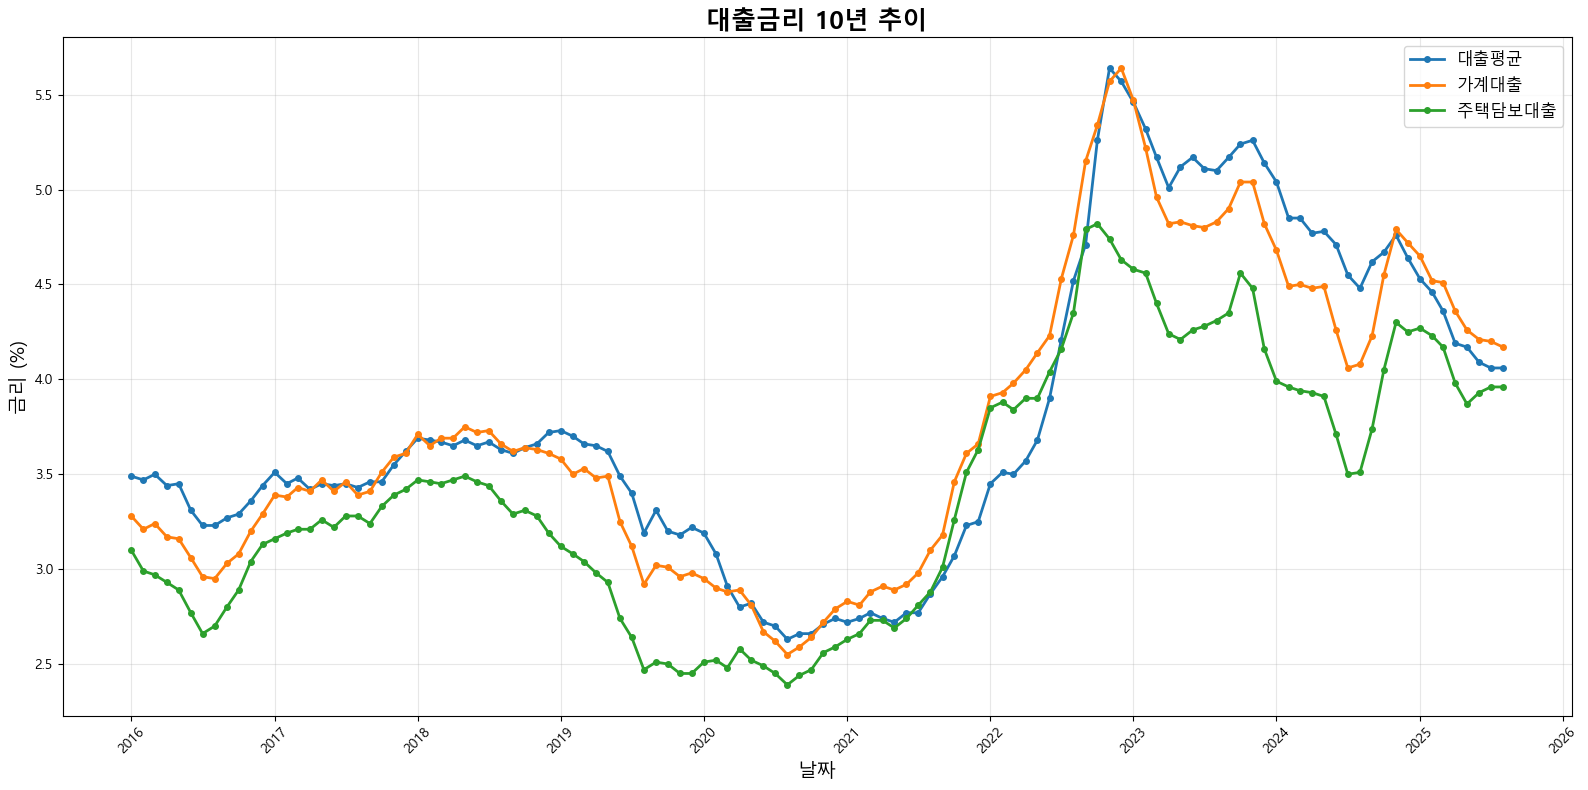

In [6]:
# 10년 데이터 그래프
plt.figure(figsize=(16, 8))

for col in df_10y.columns:
    label = col.split('(')[0].strip()
    plt.plot(df_10y.index, df_10y[col], marker='o', linewidth=2, markersize=4, label=label)

plt.title('대출금리 10년 추이', fontsize=18, fontweight='bold')
plt.xlabel('날짜', fontsize=14)
plt.ylabel('금리 (%)', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('대출금리_10년추이.png', dpi=150, bbox_inches='tight')
print("✅ 그래프 저장: 대출금리_10년추이.png")

plt.show()

In [7]:
# 10년 통계 요약
print("="*60)
print("대출금리 10년 분석 요약")
print("="*60)

print(f"\n📅 분석 기간: {df_10y.index.min().strftime('%Y년 %m월')} ~ {df_10y.index.max().strftime('%Y년 %m월')}")
print(f"📊 총 {len(df_10y)}개월 ({len(df_10y)/12:.1f}년)\n")

for col in df_10y.columns:
    label = col.split('(')[0].strip()
    avg = df_10y[col].mean()
    current = df_10y[col].iloc[-1]
    max_val = df_10y[col].max()
    min_val = df_10y[col].min()
    max_date = df_10y[col].idxmax().strftime('%Y-%m')
    min_date = df_10y[col].idxmin().strftime('%Y-%m')
    change = current - avg
    
    print(f"📈 {label}")
    print(f"   현재: {current:.2f}%")
    print(f"   평균: {avg:.2f}% (평균 대비 {change:+.2f}%p)")
    print(f"   최고: {max_val:.2f}% ({max_date})")
    print(f"   최저: {min_val:.2f}% ({min_date})")
    print(f"   변동폭: {max_val - min_val:.2f}%p")
    print()

print("="*60)

대출금리 10년 분석 요약

📅 분석 기간: 2016년 01월 ~ 2025년 08월
📊 총 116개월 (9.7년)

📈 대출평균
   현재: 3.49%
   평균: 3.79% (평균 대비 -0.30%p)
   최고: 5.64% (2022-11)
   최저: 2.63% (2020-08)
   변동폭: 3.01%p

📈 가계대출
   현재: 3.28%
   평균: 3.75% (평균 대비 -0.47%p)
   최고: 5.64% (2022-12)
   최저: 2.55% (2020-08)
   변동폭: 3.09%p

📈 주택담보대출
   현재: 3.10%
   평균: 3.41% (평균 대비 -0.31%p)
   최고: 4.82% (2022-10)
   최저: 2.39% (2020-08)
   변동폭: 2.43%p



📊 연도별 평균 금리:

계정항목별  대출평균(연%)  가계대출(연%)  주택담보대출(연%)
연도                                   
2016   3.373333  3.135833    2.905833
2017   3.476667  3.455000    3.265833
2018   3.662500  3.675000    3.389167
2019   3.445833  3.236667    2.742500
2020   2.801667  2.750833    2.500000
2021   2.884167  3.102500    2.940000
2022   4.293333  4.602500    4.241667
2023   5.189167  4.961667    4.365833
2024   4.726667  4.444167    3.899167
2025   4.240000  4.360000    4.046250

✅ 그래프 저장: 대출금리_연도별.png


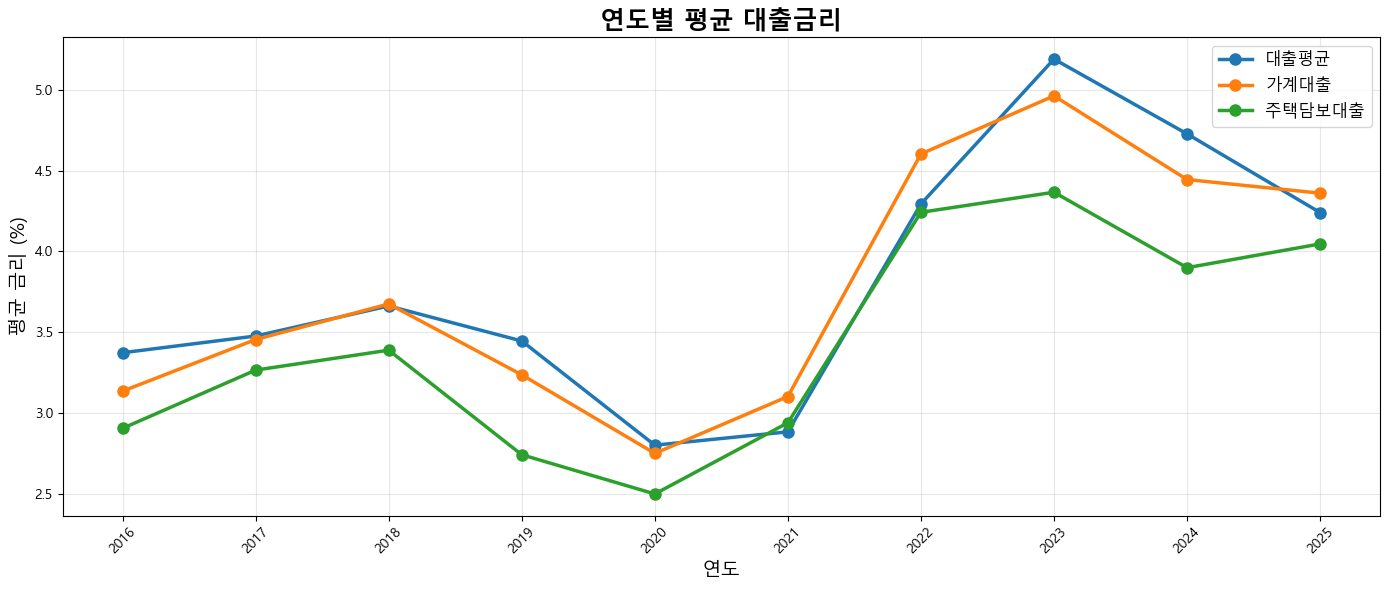

In [8]:
# 연도별 평균 분석
df_10y['연도'] = df_10y.index.year

yearly = df_10y.groupby('연도')[df_10y.columns[:-1]].mean()

print("📊 연도별 평균 금리:\n")
print(yearly.to_string())

# 연도별 그래프
plt.figure(figsize=(14, 6))

for col in yearly.columns:
    label = col.split('(')[0].strip()
    plt.plot(yearly.index, yearly[col], marker='o', linewidth=2.5, markersize=8, label=label)

plt.title('연도별 평균 대출금리', fontsize=18, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('평균 금리 (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(yearly.index, rotation=45)
plt.tight_layout()

plt.savefig('대출금리_연도별.png', dpi=150, bbox_inches='tight')
print("\n✅ 그래프 저장: 대출금리_연도별.png")

plt.show()

# 연도 컬럼 제거
df_10y = df_10y.drop('연도', axis=1)

In [9]:
# Excel 파일로 저장
output_file = '대출금리_10년분석.xlsx'

with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    # 시트 1: 월별 원본 데이터
    df_10y.to_excel(writer, sheet_name='월별데이터')
    
    # 시트 2: 연도별 평균
    df_10y_temp = df_10y.copy()
    df_10y_temp['연도'] = df_10y_temp.index.year
    yearly_data = df_10y_temp.groupby('연도').mean()
    yearly_data.to_excel(writer, sheet_name='연도별평균')
    
    # 시트 3: 통계 요약
    stats = pd.DataFrame({
        '평균': df_10y.mean(),
        '최대': df_10y.max(),
        '최소': df_10y.min(),
        '현재': df_10y.iloc[-1],
        '변동폭': df_10y.max() - df_10y.min()
    })
    stats.to_excel(writer, sheet_name='통계요약')

print(f"✅ Excel 저장 완료: {output_file}")
print(f"   - 월별데이터: {len(df_10y)}행")
print(f"   - 연도별평균: {len(yearly_data)}행")
print(f"   - 통계요약 포함")

✅ Excel 저장 완료: 대출금리_10년분석.xlsx
   - 월별데이터: 116행
   - 연도별평균: 10행
   - 통계요약 포함
